<a href="https://colab.research.google.com/github/MillenaThalyne/Decision_Tree_Iris/blob/main/%C3%81rvore_de_Decis%C3%A3o_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas e arquivo CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sklearn 
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn import tree
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Alura/Machine Learning com SKlearn/Árvore de Decisão/Dados/datasets-uci-iris.csv")
dados.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PEDAL_LENGTH,PEDAL_WIDTH,CLASS
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Usando get_dummies para separar em colunas as classes da iris
dados_novos = dados
dados_n = pd.get_dummies(dados_novos, columns=['CLASS'])
dados_n.head(10)

,SEPAL_LENGTH,SEPAL_WIDTH,PEDAL_LENGTH,PEDAL_WIDTH,CLASS_setosa,CLASS_versicolor,CLASS_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
5,5.4,3.9,1.7,0.4,1,0,0
6,4.6,3.4,1.4,0.3,1,0,0
7,5.0,3.4,1.5,0.2,1,0,0
8,4.4,2.9,1.4,0.2,1,0,0
9,4.9,3.1,1.5,0.1,1,0,0


# Visualização dos dados

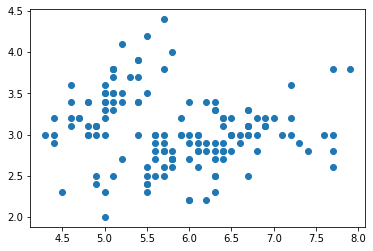

In [ ]:
#Visualização dos dados a partir do comprimento e largura da pétala  
visualizacao = plt.scatter(dados['SEPAL_LENGTH'], dados['SEPAL_WIDTH'])
plt.show()

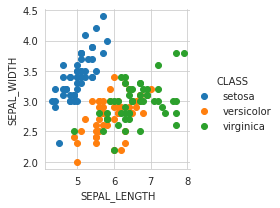

In [ ]:
#Visualização dos dados por classes: Setosa, Versicolor e Virginica
sns.set_style('whitegrid')
sns.FacetGrid(dados, hue ='CLASS').map(plt.scatter, 'SEPAL_LENGTH', 'SEPAL_WIDTH').add_legend()
plt.show()

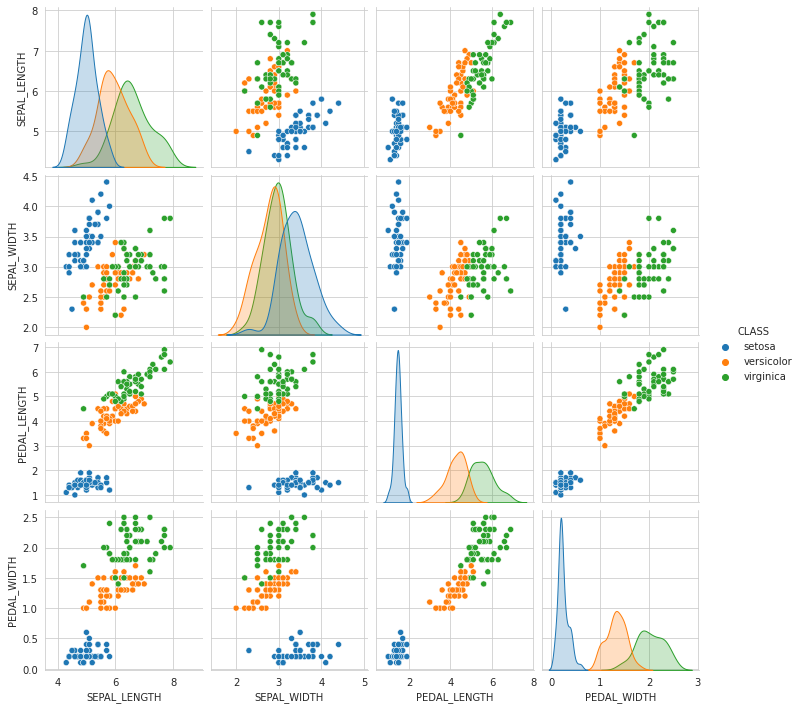

In [ ]:
#Distribuição das classes, vemos que a Setosa é a que mais se distingue dentre elas 
sns.pairplot(dados, hue='CLASS')
plt.show()

# Modelos de Classificação

In [ ]:
#Função que separa treinos e testes
def executar_validador (x, y):
  validador = StratifiedShuffleSplit(test_size=0.30, random_state=42)
  for treino_id, teste_id in validador.split(x, y):
    x_train, x_test = x[treino_id], x[teste_id]
    y_train, y_test = y[treino_id], y[teste_id]
  return x_train, x_test, y_train, y_test

In [ ]:
#Função que faz treinamentos e retorna y_pred (predições)
def executar_classificador (x_train, x_test, y_train, classificador):
  arvore = classificador.fit(x_train, y_train)
  y_pred = arvore.predict(x_test)
  return y_pred

In [ ]:
#Função que retorna acurácia, matriz de confusão, score precision e recall da árvore
def validar_arvore (y_test, y_pred):
  print('Accuracy Score:', cross_val_score(classificador_arvore_decisao, x_train, y_train, cv=3, scoring='accuracy').mean())
  print("Acurácia porcentagem:", round(accuracy_score(y_test, y_pred)*100),'%')
  print("Matriz de confusao:", multilabel_confusion_matrix(y_test, y_pred))
  print("Score de precisão:", precision_score(y_test, y_pred, pos_label='positive', average='micro'))
  print("Recall:", recall_score(y_test, y_pred, pos_label='positive', average='micro'))

In [ ]:
#Função para salvar a árvore de decisão
def salvar_arvore(classificador, nome):
  plt.figure(figsize=(200,100))
  tree.plot_tree(classificador, filled=True, fontsize=14)
  plt.savefig(nome)
  plt.close

In [ ]:
#Execução do validador e separação de x e y
x = dados.drop(['CLASS'], axis=1).values
y = dados["CLASS"].values
x_train, x_test, y_train, y_test = executar_validador(x, y)

# Construindo a árvore

In [ ]:
#Execução do classificador da árvore 
classificador_arvore_decisao = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2)
y_pred_arvore_decisao = executar_classificador(x_train, x_test, y_train, classificador_arvore_decisao)

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.5\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.375, 0.75, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.625, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.5, 0.5833333333333334, 'X[2] <= 5.05\ngini = 0.184\nsamples = 39\nvalue = [0, 35, 4]'),
 Text(0.25, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.375, 0.25, 'X[0] <= 5.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.75, 0.4166666666666667, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.625, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.75, 0.58333333333

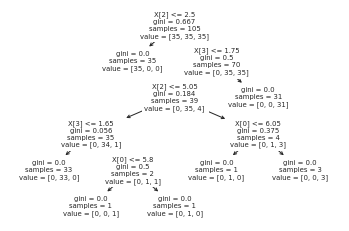

In [ ]:
tree.plot_tree(classificador_arvore_decisao)

In [ ]:
salvar_arvore(classificador_arvore_decisao, "Arvore de Decisao.png")

In [ ]:
#Validação da arvore de decisao
validar_arvore(y_test, y_pred_arvore_decisao)

Accuracy Score: 0.9619047619047619
Acurácia porcentagem: 96 %
Matriz de confusao: [[[30  0]
  [ 0 15]]

 [[29  1]
  [ 1 14]]

 [[29  1]
  [ 1 14]]]
Score de precisão: 0.9555555555555556
Recall: 0.9555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


# Testando nossa predição

In [ ]:
test = [[5.3, 3.5, 5, 1],
        [2, 3.4, 5.1, 6]]
print(classificador_arvore_decisao.predict(test)) 

['versicolor' 'virginica']


#Random Forest

In [ ]:
classificador_random_forest = RandomForestClassifier(n_estimators=100)
y_pred_random_forest = executar_classificador(x_train, x_test, y_train, classificador_random_forest)

In [ ]:
validar_arvore (y_test, y_pred_random_forest)

Accuracy Score: 0.9523809523809524
Acurácia porcentagem: 96 %
Matriz de confusao: [[[30  0]
  [ 0 15]]

 [[29  1]
  [ 1 14]]

 [[29  1]
  [ 1 14]]]
Score de precisão: 0.9555555555555556
Recall: 0.9555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
